<a href="https://colab.research.google.com/github/BrunoASNascimento/bootcamp-datascience-alura/blob/main/modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing

In [106]:
SEED=687942

# Pandas options

In [3]:
pd.options.display.float_format = "{:.2f}".format

#procedimentos_sus_internacao_valor_total_ano_mes_processamento

##Read data
This dataset is on GitHub.

Font: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [4]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/procedimentos_sus_internacao_valor_total_ano_mes_processamento.csv',
    sep=';',
    skiprows=3,
    skipfooter=12,
    encoding='ISO-8859-1',
    thousands=".",
    decimal=","
)
data.replace('-',np.nan,inplace=True)
data[data.columns[1:]]=data[data.columns[1:]].astype("float")
data

<ipython-input-4-c24b1fb4f1e5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,2009912.57,3249565.87,2942273.94,291637984.75
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,7210731.09,8096781.90,7022324.92,7209045.59,6390358.03,6697839.73,7384806.71,9131707.60,8240261.38,999998621.85
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,29445106.74,30003061.50,29680064.33,28779088.94,24792925.68,30512523.70,33099356.79,32936503.37,28587541.78,3632860959.84
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,17641837.23,16229473.38,16851334.11,14568254.23,12224393.97,12658280.69,14547134.38,17871598.61,23210624.20,2130616492.35
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,50834117.85,50622973.33,50719494.87,46991314.91,44964787.45,46197393.28,54409441.05,55180751.48,59808605.59,6197357245.98


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(153), object(1)
memory usage: 32.6+ KB


In [6]:
data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
2020/Ago     56505034.29
Total      5993731798.30
Length: 153, dtype: float64

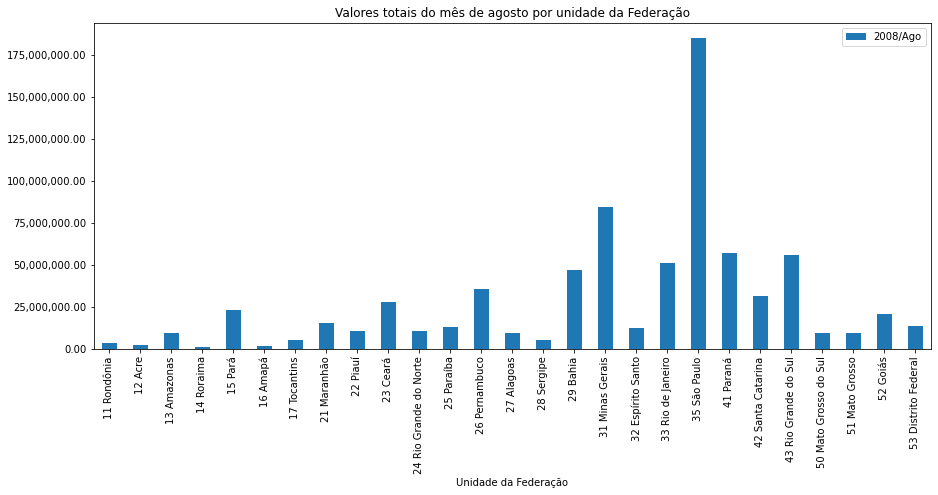

In [7]:
ax = data.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valores totais do mês de agosto por unidade da Federação")
plt.show()

2020/Ago


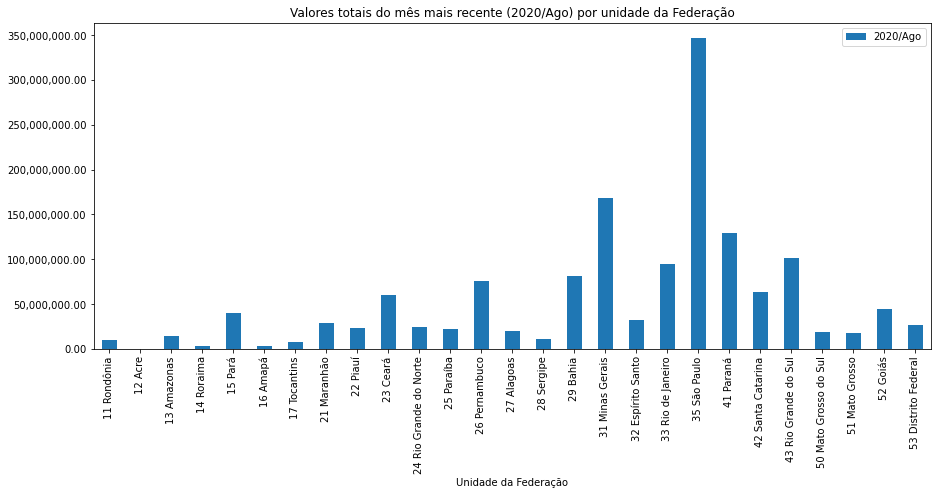

In [8]:
last_date = list(data.columns)[len(data.columns)-2]
print(last_date)
ax = data.plot(x="Unidade da Federação",y="2020/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais do mês mais recente ({last_date}) por unidade da Federação")
plt.show()

#procedimentos_sus_internacao_valor_total_ano_mes_atendimento

##Read data
This dataset is on GitHub.

Font: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [28]:
data_atendimento = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/procedimentos_sus_internacao_valor_total_ano_mes_atendimento.csv',
    sep=';',
    skiprows=3,
    skipfooter=12,
    encoding='ISO-8859-1',
    thousands=".",
    decimal=","
)
data_atendimento.replace('-',np.nan,inplace=True)
data_atendimento[data_atendimento.columns[1:]]=data_atendimento[data_atendimento.columns[1:]].astype("float")
data_atendimento

<ipython-input-28-2127f1304cb7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_atendimento = pd.read_csv(


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71
5,16 Amapá,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31,291637984.75
6,17 Tocantins,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,2453362.74,999998621.85
7,21 Maranhão,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,10916718.78,3632860959.84
8,22 Piauí,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,7926321.69,2130616492.35
9,23 Ceará,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,48447583.61,53086389.30,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22,14559529.59,6197357245.98


In [29]:
data_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


In [30]:
data_atendimento.mean()

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 279, dtype: float64

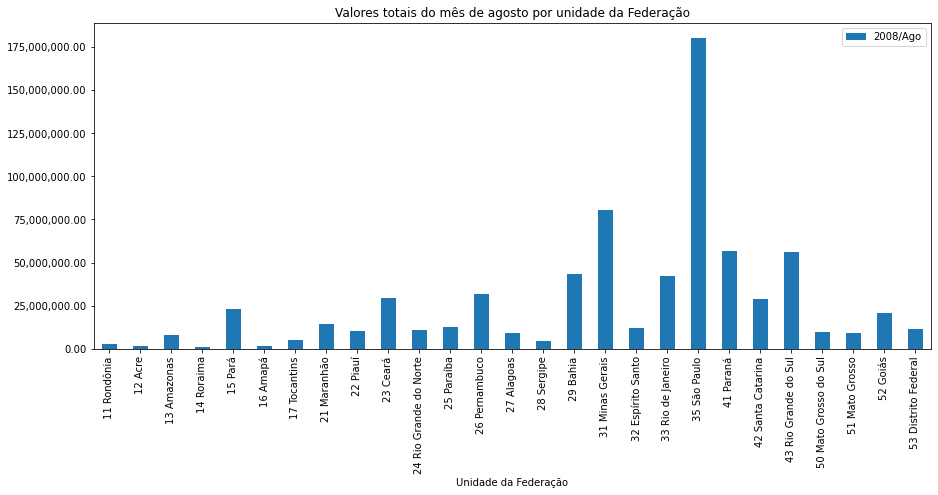

In [31]:
ax = data_atendimento.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valores totais do mês de agosto por unidade da Federação")
plt.show()

2020/Ago


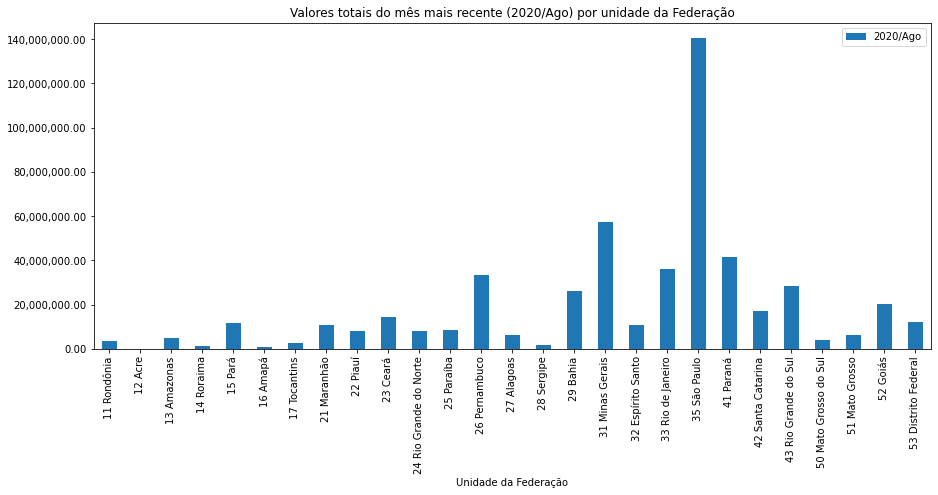

In [32]:
last_date = list(data_atendimento.columns)[len(data_atendimento.columns)-2]
print(last_date)
ax = data_atendimento.plot(x="Unidade da Federação",y="2020/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais do mês mais recente ({last_date}) por unidade da Federação")
plt.show()

In [191]:
usable_columns = data_atendimento.dropna(axis='columns').columns.to_list()[7:]
usable_columns.insert(0,"Unidade da Federação")
usable_data = data_atendimento[usable_columns]
usable_data.head()

,Unidade da Federação,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [192]:
usable_data.set_index("Unidade da Federação",inplace=True)
usable_data.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [193]:
usable_data.drop("Total",axis=1,inplace=True,errors='ignore')
usable_data.head()

C:\Users\bruno\.conda\envs\study\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


In [194]:
usable_data.describe()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,23816397.50,25876082.14,26210419.17,26215326.43,26215813.95,27487256.94,26636409.89,27049886.85,28081122.60,27341312.17,...,51035126.81,47560486.81,45776962.72,49365504.99,45084524.48,45236027.39,40005678.92,46769027.82,45367349.74,40717083.95
std,34438026.15,34803780.06,34778272.53,35053393.15,35598113.03,37029076.40,36524519.40,36726417.77,39123815.90,38529429.56,...,65054555.98,60419931.36,58350827.23,63825806.17,57378788.07,58487564.07,52470681.18,61740606.78,60665540.70,56808984.40
min,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2383895.48,2199920.70,1163813.08
25%,7932273.51,8926011.35,8764559.62,9229049.70,9048298.18,9070623.45,8659787.96,8495575.76,8459479.91,8610319.01,...,16398600.84,14939347.41,14375543.21,15692627.48,14784641.29,14608973.50,11911150.34,14078268.37,14431940.75,12795934.52
50%,10215956.80,12262049.08,12453466.98,11900817.00,11969271.76,12205584.14,12384068.19,12486952.61,12727661.14,12458082.28,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,18123899.78,21437430.22,23479773.03,22233542.26
75%,26932691.98,30400866.02,30982776.89,31299728.93,29228628.94,30644103.88,30505059.15,30714798.99,31507889.25,30652596.86,...,69608126.18,65519297.75,61533541.38,67088405.95,61050699.36,58169318.08,52511861.34,59300190.02,60831524.31,55331317.58
max,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31


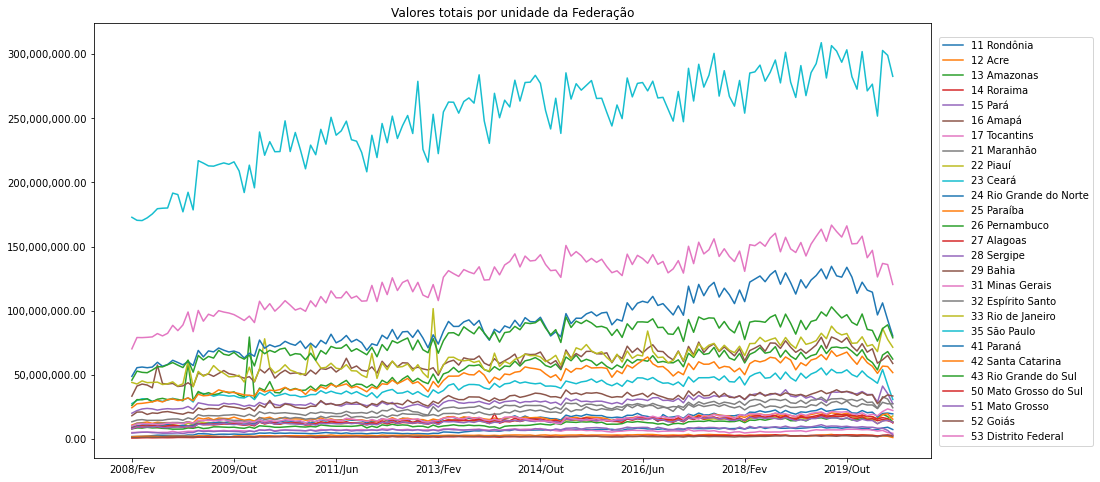

In [195]:
ax =usable_data.T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

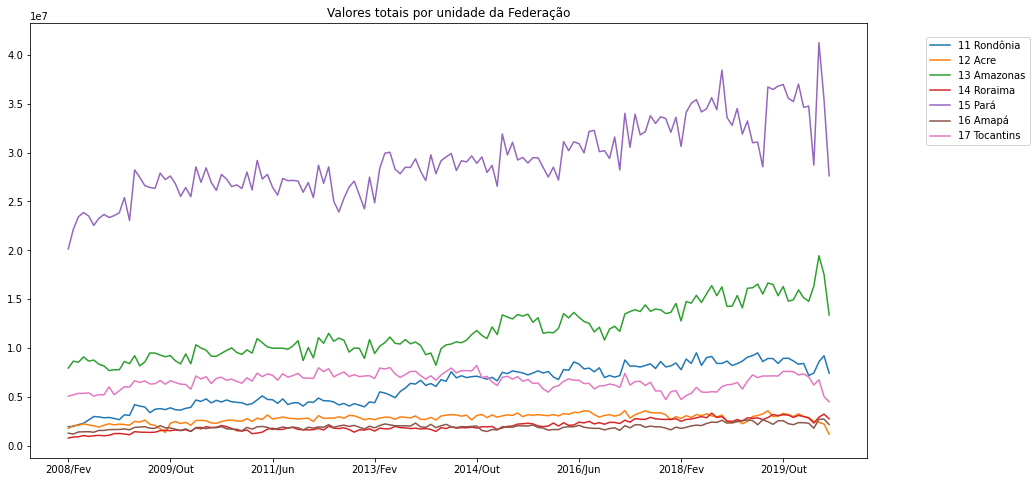

In [196]:
usable_data[:7].T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

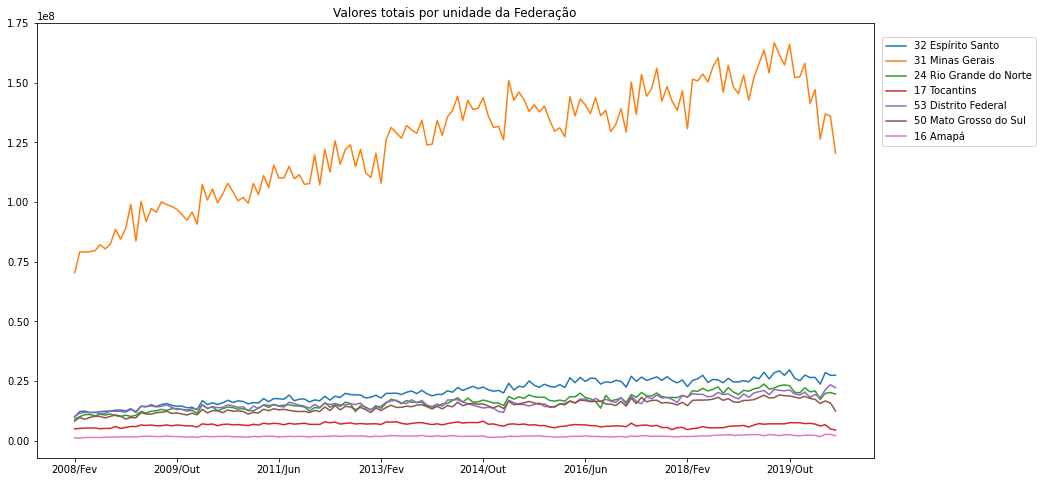

In [197]:
usable_data.sample(n=7,random_state =SEED).T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()

In [198]:
data_info_uf = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/uf_estados_lat_lon.csv',
    sep=','    
)
data_info_uf.head()

,codigo_uf,uf,nome,latitude,longitude
0,11,RO,Rondônia,-10.83,-63.34
1,12,AC,Acre,-8.77,-70.55
2,13,AM,Amazonas,-3.47,-65.10
3,14,RR,Roraima,1.99,-61.33
4,15,PA,Pará,-3.79,-52.48


In [199]:
usable_data["uf"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['uf'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data["latitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['latitude'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data["longitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['longitude'].values[0] for cod_uf in usable_data.index.to_list()]
usable_data.head()

<ipython-input-199-37a2b30ba6c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["uf"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['uf'].values[0] for cod_uf in usable_data.index.to_list()]
<ipython-input-199-37a2b30ba6c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["latitude"] = [ data_info_uf[data_info_uf["codigo_uf"]==int(cod_uf[:2])]['latitude'].values[0] for cod_uf in usable_data.index.to_list()]
<ipython-input-199-37a2b30ba6c4>:3: SettingWithCopyWarning: 

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48


In [200]:
usable_data["Total"] = usable_data.sum(axis=1)
usable_data

<ipython-input-200-4d951ebc18de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["Total"] = usable_data.sum(axis=1)


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34,922530117.20
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55,417753323.20
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10,1747039149.00
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33,301776981.57
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48,4382999318.74
16 Amapá,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,...,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,AP,1.41,-51.77,288124217.67
17 Tocantins,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,...,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,TO,-9.46,-48.26,987855372.78
21 Maranhão,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.20,14609872.57,15317881.85,15617699.59,15643973.86,...,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,MA,-5.42,-45.44,3583485070.44
22 Piauí,9711680.20,10428191.09,10227943.00,10562148.66,10465088.93,10618079.70,10645917.52,11037940.55,11143375.71,10583049.66,...,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,PI,-6.60,-42.28,2102312491.19


In [201]:
x = usable_data[["Total"]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
usable_data["Total_normalizado"] =x_scaled
usable_data.head()

<ipython-input-201-84887ed107e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data["Total_normalizado"] =x_scaled


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,uf,latitude,longitude,Total,Total_normalizado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,RO,-10.83,-63.34,922530117.20,0.02
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,AC,-8.77,-70.55,417753323.20,0.00
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,AM,-3.47,-65.10,1747039149.00,0.04
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,RR,1.99,-61.33,301776981.57,0.00
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,PA,-3.79,-52.48,4382999318.74,0.11


In [202]:
folium_map = folium.Map(location=[-14, -45],
                        zoom_start=4,
                        tiles='CartoDB dark_matter')
for index, row in usable_data.iterrows():
    print(row["latitude"])

    folium.CircleMarker(
    location=[row["latitude"], row["longitude"]],
    radius=20*row["Total_normalizado"],
    popup=index,
    color='#fff',
    fill=True,
    fill_color='#fff'
).add_to(folium_map)
folium_map

-10.83
-8.77
-3.47
1.99
-3.79
1.41
-9.46
-5.42
-6.6
-5.2
-5.81
-7.28
-8.38
-9.62
-10.57
-13.29
-18.1
-19.19
-22.25
-22.19
-24.89
-27.45
-30.17
-20.51
-12.64
-15.98
-15.83


['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul', '33 Rio de Janeiro', '23 Ceará']


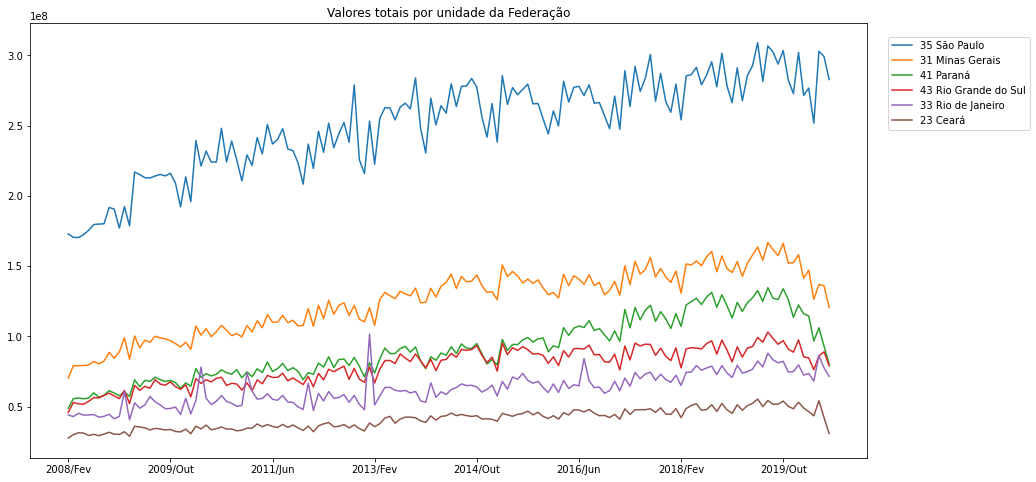

In [231]:
data_state_plot = usable_data.sort_values(by="Total",ascending=False).drop(["uf",	"latitude",	"longitude"	,"Total",	"Total_normalizado"],axis=1,errors='ignore')
states_to_plot = usable_data.sort_values(by="Total",ascending=False).drop(["uf",	"latitude",	"longitude"	,"Total",	"Total_normalizado"],axis=1,errors='ignore')[:5].T.columns.to_list()
states_to_plot.insert(6,"23 Ceará")
print(states_to_plot)
data_state_plot.loc[states_to_plot].T.plot(figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais por unidade da Federação")
plt.legend(loc='upper right',bbox_to_anchor=(1.20, 0.98))
plt.show()